In [3]:
import os
import numpy as np
from scipy.optimize import nnls
from pbwrap.utils import open_image

# Load example image

In [4]:
PATH = "/media/SSD_floricslimani/AF_eraser_images/transfer_10932528_files_12e3cdbe/"
images_filenames = os.listdir(PATH)
images_filenames


['Col P0 SPX1 probe Root FISH Im5.czi',
 'signal.tif',
 'Col P0 SPX1 probe Root FISH Im7.czi',
 'Col P0 SPX1 probe Root FISH Im6.czi',
 'Col P0 SPX1 probe Root FISH Im4.czi',
 'af.tif']

In [5]:
signal_filename = 'Col P0 SPX1 probe Root FISH Im6.czi'

In [6]:
signal_image = open_image(PATH + signal_filename).squeeze()
signal_image.shape

(3, 39, 512, 512)

In [7]:
images = [chan for chan in signal_image]

# API testing

In [8]:
from NMF import remove_autofluorescence_NMF
from substraction import remove_autofluorescence_RANSACfit
from NMF import (
    _estimate_target_matrix,
    _apply_gaussian_filter_on_target_matrix,
    _acess_convergence,
    _compute_error,
    _extract_resulting_signals,
    _estimate_coef_and_darkcurrent,
    _initialize_matrix,
    
)

## Non negative matrix factorization

In [ ]:
signal, af, residuals = remove_autofluorescence_NMF(
    images= images,
    exposure_time = [100, 5000, 5000],
    gaussian_kernel = 5,
    max_iteration=50
)

In [10]:
ransac_signal, score = remove_autofluorescence_RANSACfit(
    signal = images[0],
    background = images[2],
    max_trials = 500
)

OverflowError: Python integer -93 out of bounds for uint16

# Output results

In [17]:
import bigfish.stack as stack
stack.save_image(signal, PATH + "/signal.tif")
stack.save_image(af, PATH + "/af.tif")

# Napari results

In [18]:
%gui qt
import napari

ERROR:root:
    Could not load requested Qt binding. Please ensure that
    PyQt4 >= 4.7, PyQt5, PyQt6, PySide >= 1.0.3, PySide2, or
    PySide6 is available, and only one is imported per session.

    Currently-imported Qt library:                              None
    PyQt5 available (requires QtCore, QtGui, QtSvg, QtWidgets): False
    PyQt6 available (requires QtCore, QtGui, QtSvg, QtWidgets): False
    PySide2 installed:                                          False
    PySide6 installed:                                          False
    Tried to load:                                              ['pyqtdefault', 'pyqt6', 'pyside6', 'pyqt5', 'pyside2']
    


In [19]:
Viewer = napari.Viewer()
Viewer.add_image(signal)

<Image layer 'signal' at 0x7e7402867740>

# Residual plot

In [20]:
import matplotlib.pyplot as plt

In [21]:
residuals.keys()

dict_keys(['decomposed_signal_matrix', 'dark_current_matrix', 'linear_coef_matrix'])

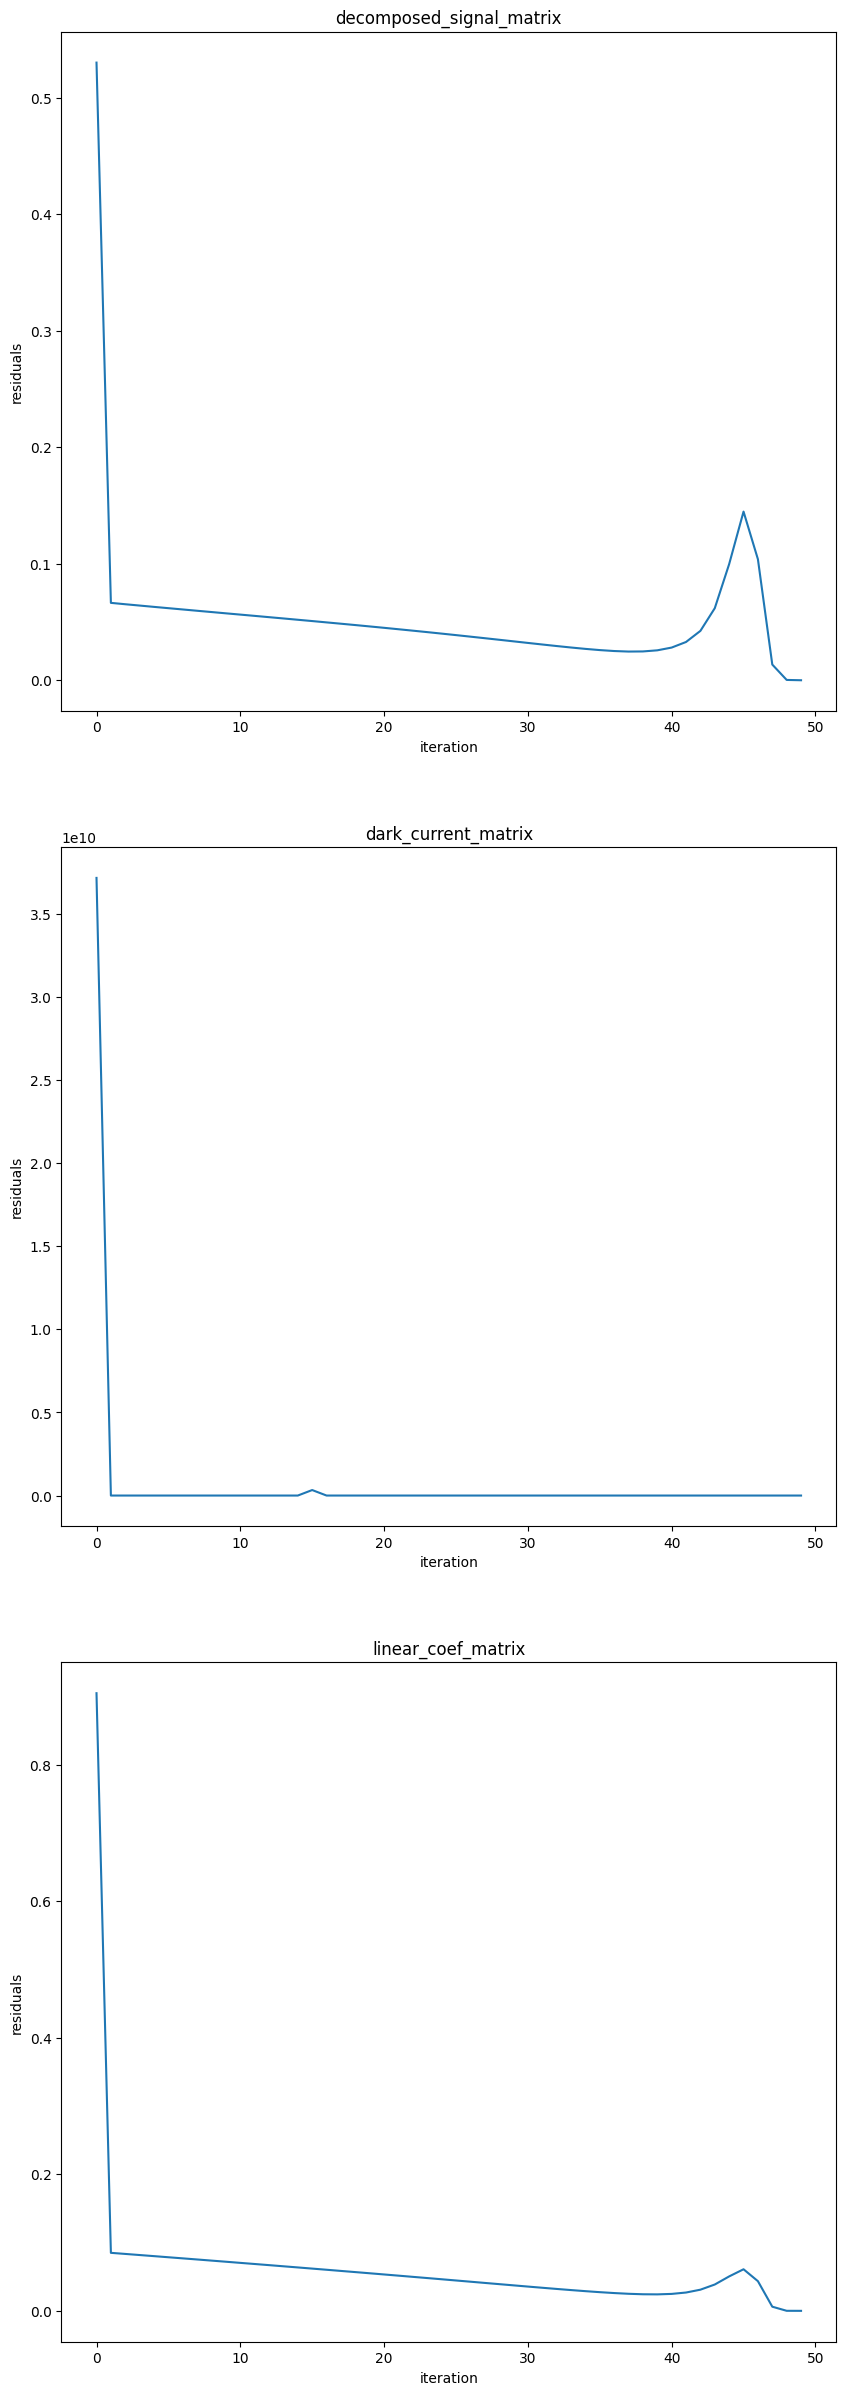

In [22]:
fig = plt.figure(figsize=(10,30))
a = fig.subplots(3,1)

for key, ax in zip(residuals.keys(), a) :
    data = residuals[key]
    ax.plot(
        np.arange(len(data)),
        data
    )
    
    ax.set_title(key)
    ax.set_xlabel("iteration")
    ax.set_ylabel("residuals")